In [1]:
import corner
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import units as u
import matplotlib
from pm_func_edr3 import *

In [2]:
#### Load in Data

dir = "D:/pzivi/Research/Gurtina_Project/"

datasource = "allstar_Model2_oldcore"
data = Table.read(dir + "Data/"+datasource+".fits")

print(data.info())

perm = 'standard'
priors, nparams, params = get_priors(perm)

nwalk = 50
nsamp = 1500
ver = "_nw" + str(nwalk) + "_ns" + str(nsamp)
#ver = ""

print("Number of stars in " + datasource + " is " + str(len(data)))

outfilecore = datasource + "_" + perm


samples = np.loadtxt('MCMC/' + outfilecore + ver + "_mcmc_results.txt")

chain = np.loadtxt('MCMC/' + outfilecore + ver + "_marginalized_density.txt")

<Table length=162328>
   name    dtype 
--------- -------
      Age float64
      X_0 float64
      Y_0 float64
      Z_0 float64
     Vx_0 float64
     Vy_0 float64
     Vz_0 float64
      X_G float64
      Y_G float64
      Z_G float64
     Vx_G float64
     Vy_G float64
     Vz_G float64
       RA float64
      DEC float64
     Dist float64
     PMRA float64
    PMDEC float64
       RV float64
        x float64
        y float64
   muwcor float64
   muncor float64
    rvcor float64
 rel_pmra float64
rel_pmdec float64
   rel_rv float64
  rel_pmx float64
  rel_pmy float64
   rel_PA float64
None
Number of stars in allstar_Model2_oldcore is 162328


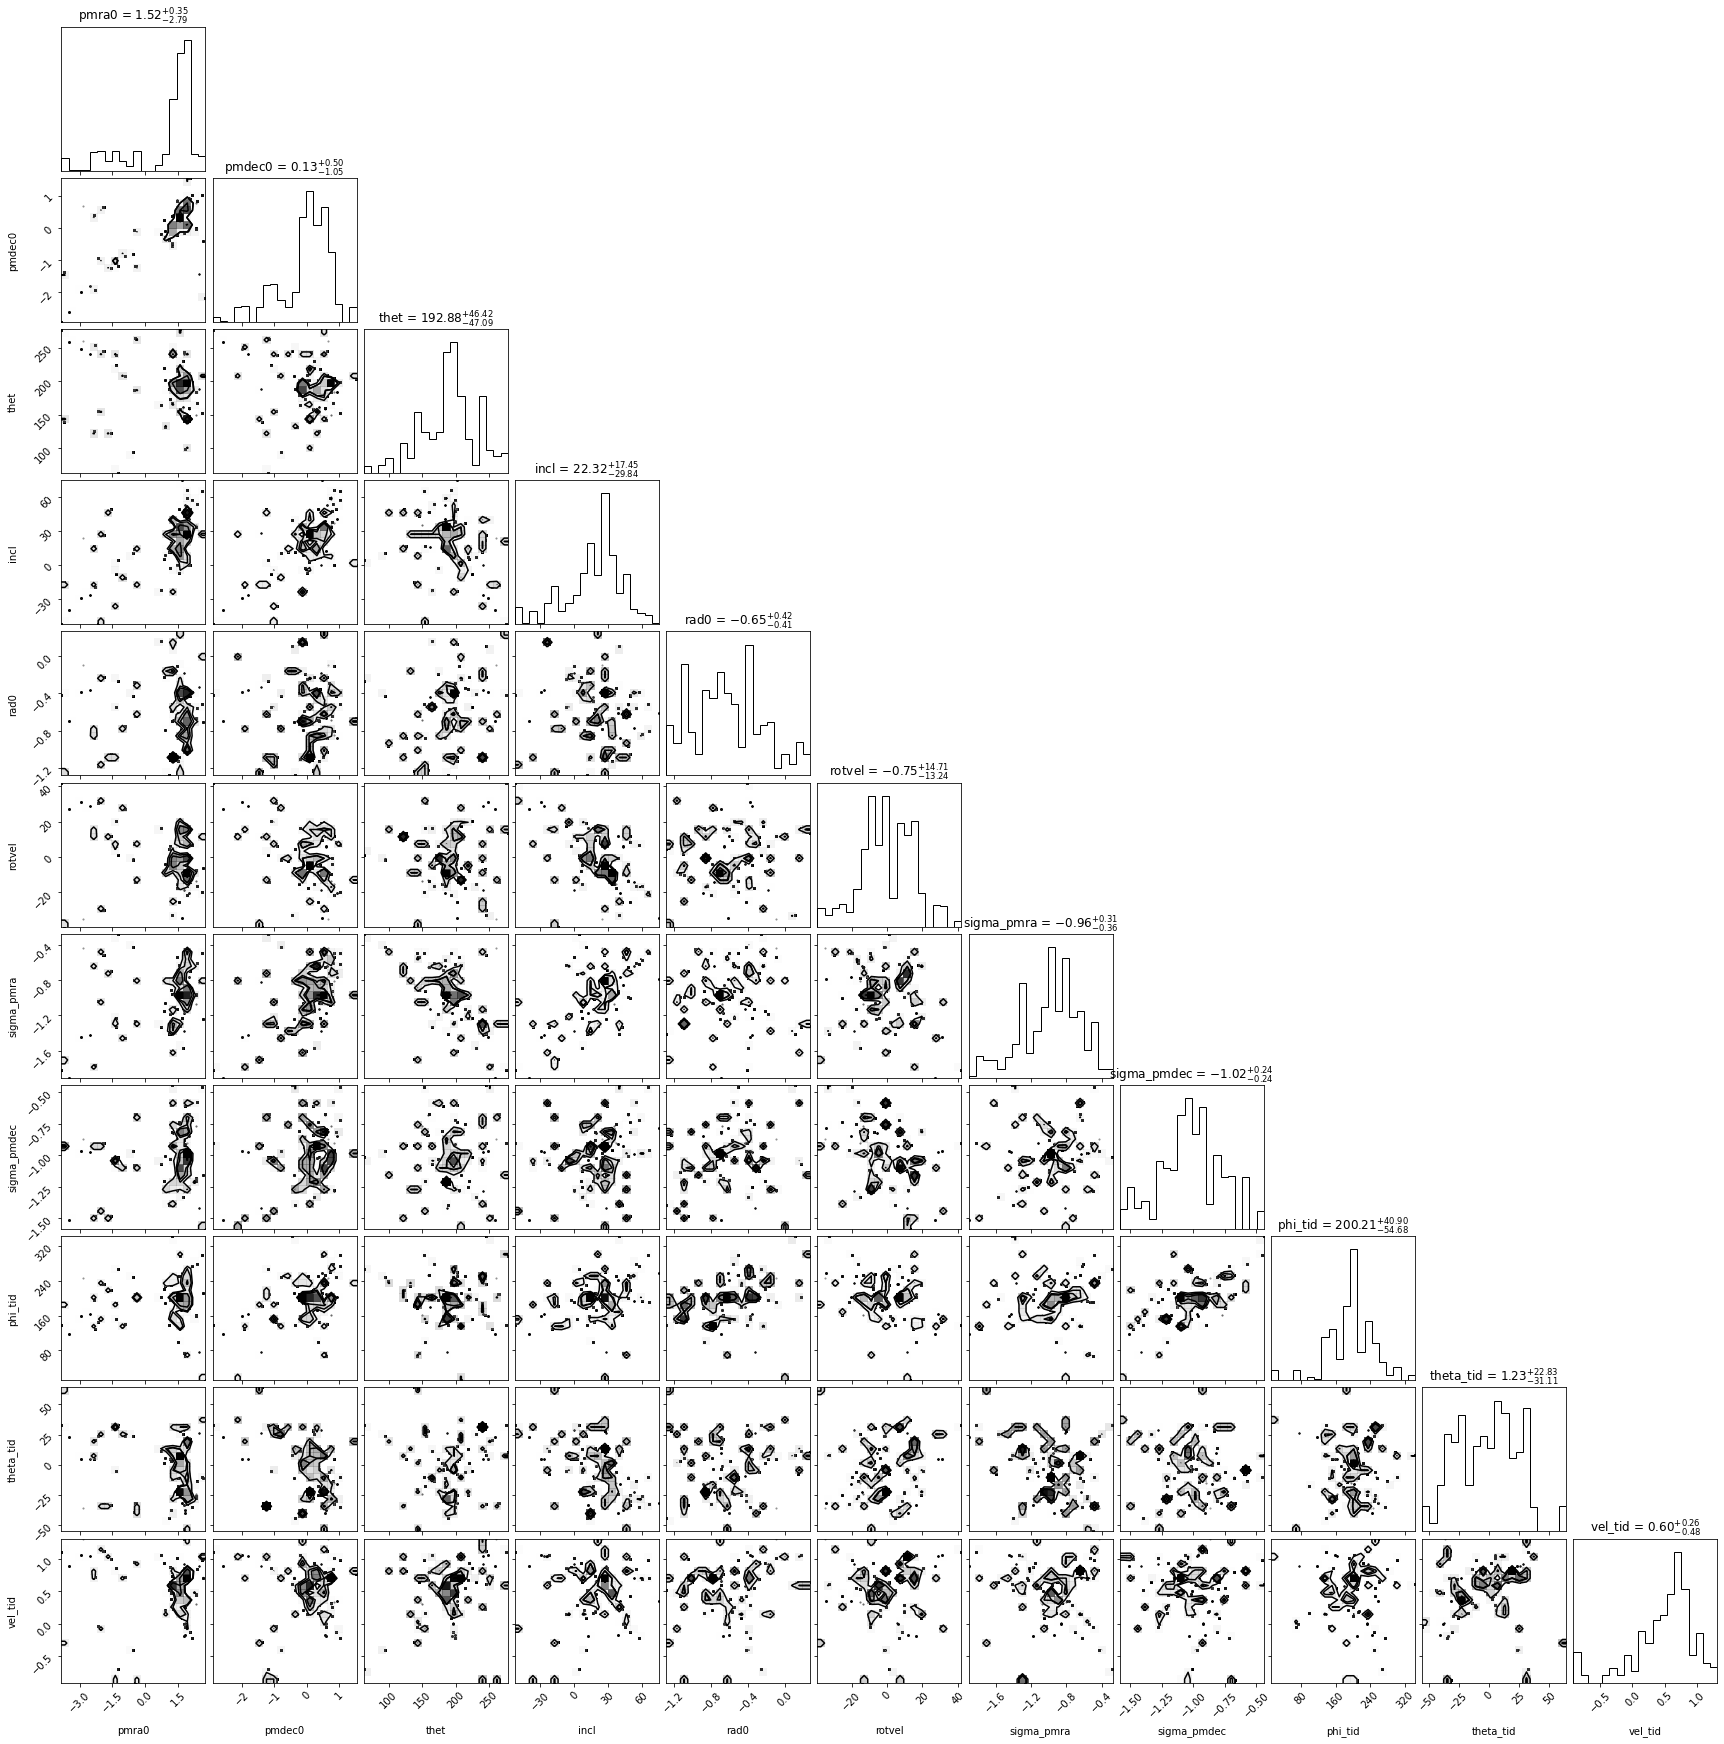

In [3]:
#display_range = []
#for a in range(nparams):
#    mcmc_med = np.median(mcmc_Results[:,a])
#    mcmc_std = 0.3*np.std(mcmc_Results[:,a])
#    display_range.append((mcmc_med - mcmc_std, mcmc_med + mcmc_std))
    
display_range = np.full(nparams, 0.95)

#fig = corner.corner(mcmc_Results,labels=guesses['param'],quantiles=[0.16, 0.5, 0.84],\
#                    show_titles=True, title_kwargs={"fontsize": 12},figsize = (7, 7))

fig = corner.corner(samples, labels=params,show_titles=True, title_kwargs={"fontsize": 12},\
                    figsize = (7, 7))#, range=display_range)
plt.savefig('MCMC/' + outfilecore + "_cornerplot.png", dpi=300)

<Figure size 432x288 with 0 Axes>

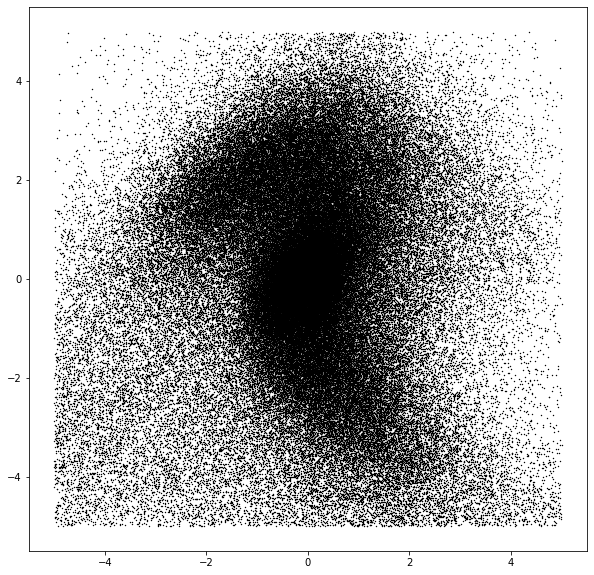

<Figure size 432x288 with 0 Axes>

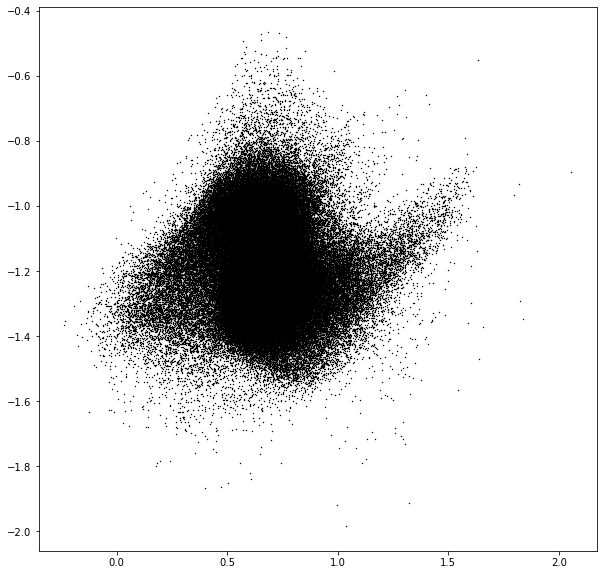

In [5]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(data['x'], data['y'], s=2, lw=0, color='black')

plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(data['PMRA'], data['PMDEC'], s=2, lw=0, color='black')

plt.show()